## Imports and dataset loading

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

originalDataSet = []
ampNumbers      = [2, 3, 4, 5, 6, 7, 8]

gainArray = []
lossArray = []

for amp in ampNumbers:
    originalDataSet.append(pd.read_csv('datasets/1_channel_type/dataset-{}.txt'.format(amp), sep = ',',header = None))

def loadDataset(channelIndex):    
    dataSet = originalDataSet[channelIndex].values
    X, y    = np.array(dataSet[:, :40]), np.array(dataSet[:, 40:])
    return X, y

## Setting data for plotting

In [2]:
for i in range(7):
    gainSlices = []
    lossSlices = []
    X, y       = loadDataset(i)
    ampNumber  = i + 2
        
    for j in range(ampNumber):
        gainSlices.append(y[:, j * 2])
        lossSlices.append(y[:, j * 2 + 1])

    gainArray.append(np.stack(gainSlices, axis = -1))
    lossArray.append(np.stack(lossSlices, axis = -1))

## Plotting functions

In [3]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
def plot():
    fontSize = 32
    aux = 2.1
    
    for i in range(7):
        fig, axis = plt.subplots(1, figsize = (10, 5.5))
        
        gainData = []
        lossData = []
        ticks    = []  

        for j in range(ampNumbers[i]):
            gainData.append(gainArray[i][:, j])
            lossData.append(lossArray[i][:, j])
            ticks.append(u"A{}".format(j + 1))
        
        print("Gain: {} (+- {})".format(np.mean(gainData[-1]), np.std(gainData[-1])))
        print("Loss: {} (+- {})".format(np.mean(lossData[-1]), np.std(lossData[-1])))
        print("\n")
        
        gainBP = axis.boxplot(gainData, positions = np.array(range(len(gainData)))*3.0 - 0.2, sym = "")
        lossBP = axis.boxplot(lossData, positions = np.array(range(len(lossData)))*3.0 + 0.2, sym = "")
        
        axis.xaxis.set_tick_params(labelsize = fontSize)
        axis.yaxis.set_tick_params(labelsize = fontSize)
        axis.set_xticks(range(0, len(ticks) * 3, 3))
        axis.set_xticklabels(ticks)
        
        axis.axis(xmin = -1, xmax = len(ticks) * aux)
        
        aux += 0.15
        
        set_box_color(gainBP, '#2C7BB6')
        set_box_color(lossBP, '#D7191C')
    
        plt.plot([], c = '#2C7BB6', label = 'Gain')
        plt.plot([], c = '#D7191C', label = 'Loss')
        fig.text(-0.015, 0.5, u'Metrics (dB)', va='center', rotation='vertical', fontsize = 30)

        fig.legend(loc = 'center right', prop={'size': 28})
        fig.tight_layout()

        fig.savefig("output/boxplots-{}amp.pdf".format(i + 2), format = 'pdf', dpi = 1000, bbox_inches = "tight")

## Plotting

Gain: 22.3730434783 (+- 1.80505674916)
Loss: 0.724347826087 (+- 0.996349101064)


Gain: 21.7101269743 (+- 1.71477094909)
Loss: 0.275317435739 (+- 0.549850848221)


Gain: 21.9642069135 (+- 1.72465886493)
Loss: 0.43196861976 (+- 0.711491376211)


Gain: 22.3751546647 (+- 1.82609867187)
Loss: 0.543677307597 (+- 0.787576914021)


Gain: 22.6067827681 (+- 1.69603781744)
Loss: 0.500458295142 (+- 0.710501153382)


Gain: 22.8197556008 (+- 1.31461188984)
Loss: 0.671079429735 (+- 0.855531097067)


Gain: 22.9756097561 (+- 1.29704739515)
Loss: 0.624390243902 (+- 0.758940367787)




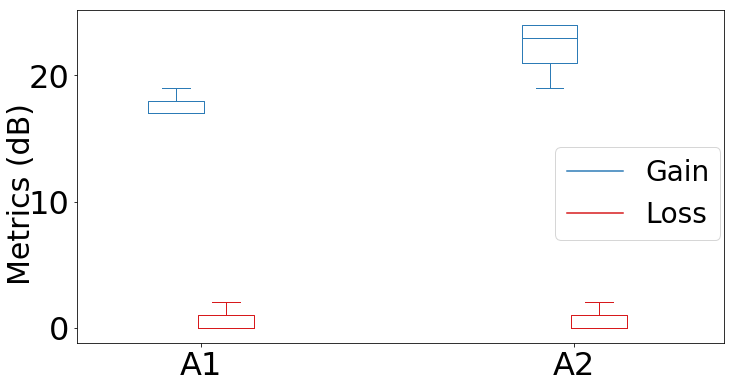

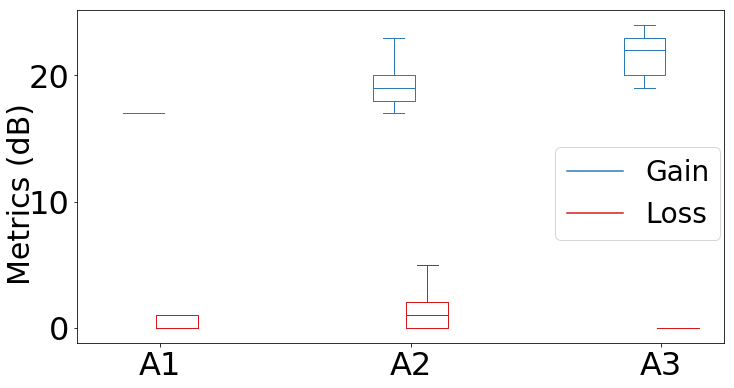

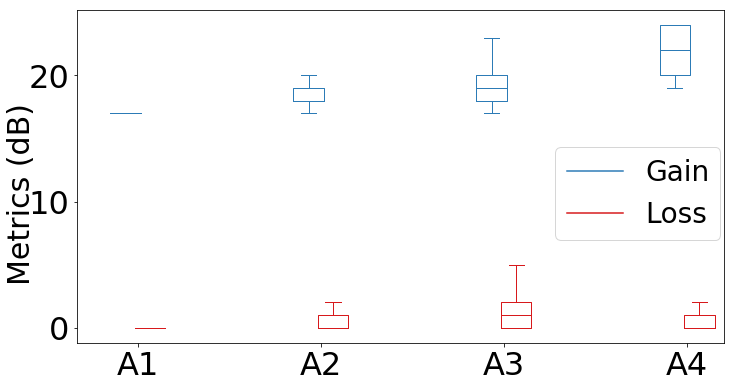

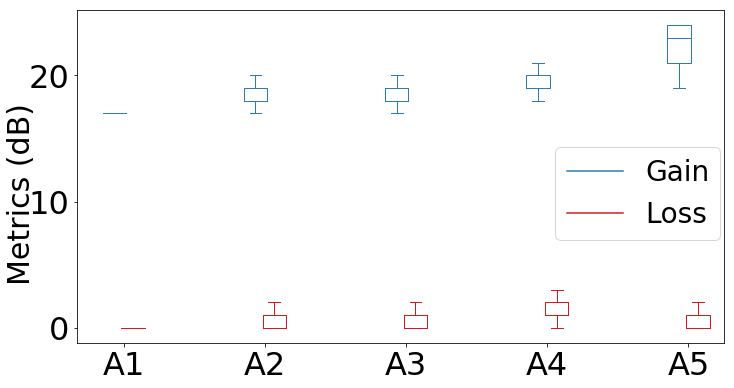

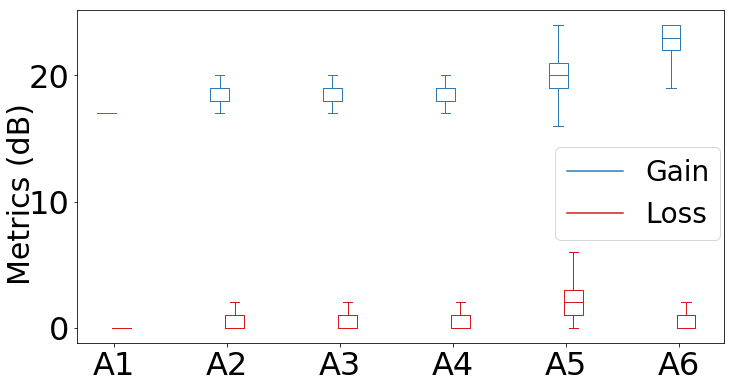

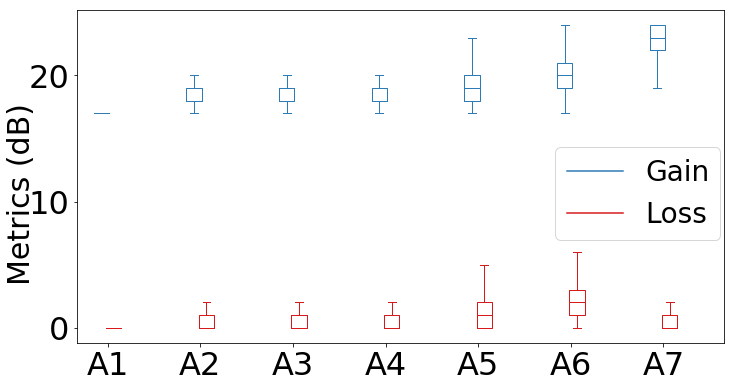

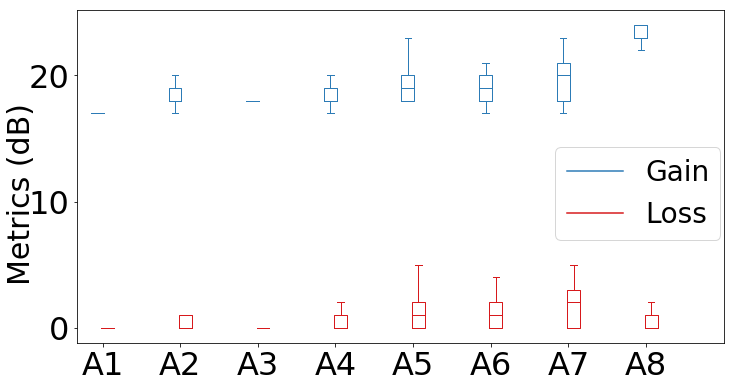

In [4]:
plot()